In [1]:
import surprise

In [2]:
## 고유값(특이값)분해 방법
from surprise import SVD
## SGD(Stochastic 통계적인 Gradient 경사 하강법)
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [3]:
import pandas as pd
import numpy as np

In [4]:
rating = pd.read_csv('ratings_trip.csv', index_col=0)
rating

,userID,rating,area
0,1000101,4.0,경기도 수원시
1,1000102,4.0,경기도 양주시
2,1000203,4.0,강원도 강릉시
5,1000303,4.0,인천광역시 연수구
7,1000401,4.0,강원도 속초시
...,...,...,...
11296,1539203,4.0,부산광역시 부산진구
11297,1539203,4.0,부산광역시 부산진구
11298,1539202,5.0,라북도 전주시
11299,1539203,3.0,경상남도 의령군


In [5]:
area = pd.read_csv('place_trip.csv', index_col=0)
area

,place_info,area,target
0,구절리역(폐역),강원도 정선군,"힐링, 호캉스"
1,만년저수지,전라남도 해남군,"힐링, 호캉스"
2,대암소류지,경상남도 진주시,"힐링, 호캉스"
3,대양소류지,충청북도 보은군,"힐링, 호캉스"
4,대장저수지,전라남도 신안군,"힐링, 호캉스"
...,...,...,...
38435,쌍계사수목장림,경기도 안산시,"축제, 관광"
38436,파주눈내리는초리골축제,경기도 파주시,"축제, 관광"
38437,토리딸기팜,경상남도 창원시,액티비티
38438,고성만해지개길,경상남도 고성군,"식도락, 맛집투어"


In [6]:
user = pd.read_csv('user_trip.csv', index_col=0)
user

,userID,sex,age,living_area,living_area_size,occupation,family_size,marry,income_per_year
0,1000101,남성,40,서울특별시,대도시,전문가 및 관련 종사자,4,배우자 있음,4000
1,1000102,여성,40,서울특별시,대도시,가정주부,4,배우자 있음,4000
2,1000201,남성,41,서울특별시,대도시,서비스 종사자,3,미혼,4000
3,1000202,여성,73,서울특별시,대도시,가정주부,3,사별,4000
4,1000203,여성,46,서울특별시,대도시,단순노무자,3,배우자 있음,4000
...,...,...,...,...,...,...,...,...,...
6165,1539203,여성,16,경상남도,중소도시,고등학생,4,미혼,4500
6166,1539501,남성,51,경상남도,중소도시,판매 종사자,3,배우자 있음,7000
6167,1539502,여성,39,경상남도,중소도시,관리자,3,배우자 있음,7000
6168,1539901,남성,39,부산광역시,중소도시,사무 종사자,4,배우자 있음,9000


In [7]:
reader = Reader(rating_scale=(1,5.0)) # 1단위, 최대값 5

In [8]:
data = Dataset.load_from_df(rating[['userID', 'area','rating']], reader)
data

In [9]:
trainset, testset = train_test_split(data, test_size=0.25, random_state=0)
trainset

In [10]:
testset[0]

(1182902, '전라남도 신안군', 3.0)

In [11]:
algo = SVD()

In [12]:
algo.fit(trainset)

In [13]:
predictions = algo.test(testset)
predictions[:5]

[Prediction(uid=1182902, iid='전라남도 신안군', r_ui=3.0, est=3.6416047499303015, details={'was_impossible': False}),
 Prediction(uid=1218701, iid='충청남도 보령시', r_ui=5.0, est=3.9378832527415404, details={'was_impossible': False}),
 Prediction(uid=1500901, iid='경기도 광명시', r_ui=4.0, est=4.08925200667221, details={'was_impossible': False}),
 Prediction(uid=1098901, iid='경상북도 경산시', r_ui=4.0, est=3.793408718499537, details={'was_impossible': False}),
 Prediction(uid=1261701, iid='경상남도 산청군', r_ui=4.0, est=4.607228013845983, details={'was_impossible': False})]

In [14]:
accuracy.rmse(predictions)

RMSE: 0.4760


0.4759974594939522

In [15]:
user_df = pd.get_dummies(user)
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6170 entries, 0 to 6169
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   userID                        6170 non-null   int64
 1   age                           6170 non-null   int64
 2   family_size                   6170 non-null   int64
 3   income_per_year               6170 non-null   int64
 4   sex_남성                        6170 non-null   uint8
 5   sex_여성                        6170 non-null   uint8
 6   living_area_강원도               6170 non-null   uint8
 7   living_area_경기도               6170 non-null   uint8
 8   living_area_경상남도              6170 non-null   uint8
 9   living_area_경상북도              6170 non-null   uint8
 10  living_area_광주광역시             6170 non-null   uint8
 11  living_area_대구광역시             6170 non-null   uint8
 12  living_area_대전광역시             6170 non-null   uint8
 13  living_area_부산광역시             617

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances


In [43]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6170 entries, 0 to 6169
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   userID                        6170 non-null   int64
 1   age                           6170 non-null   int64
 2   family_size                   6170 non-null   int64
 3   income_per_year               6170 non-null   int64
 4   sex_남성                        6170 non-null   uint8
 5   sex_여성                        6170 non-null   uint8
 6   living_area_강원도               6170 non-null   uint8
 7   living_area_경기도               6170 non-null   uint8
 8   living_area_경상남도              6170 non-null   uint8
 9   living_area_경상북도              6170 non-null   uint8
 10  living_area_광주광역시             6170 non-null   uint8
 11  living_area_대구광역시             6170 non-null   uint8
 12  living_area_대전광역시             6170 non-null   uint8
 13  living_area_부산광역시             617

In [57]:
col_data = user_df.iloc[:,1:].columns
user_matrix = user_df.iloc[:,1:].to_numpy()

In [58]:
cosine_sim = cosine_similarity(user_matrix,user_matrix)
cosine_sim

array([[1.        , 0.99999988, 0.99999981, ..., 0.99998986, 0.99998366,
        0.999983  ],
       [0.99999988, 1.        , 0.99999975, ..., 0.9999899 , 0.99998363,
        0.99998305],
       [0.99999981, 0.99999975, 1.        , ..., 0.9999888 , 0.99998229,
        0.9999816 ],
       ...,
       [0.99998986, 0.9999899 , 0.9999888 , ..., 1.        , 0.99999918,
        0.99999906],
       [0.99998366, 0.99998363, 0.99998229, ..., 0.99999918, 1.        ,
        0.99999997],
       [0.999983  , 0.99998305, 0.9999816 , ..., 0.99999906, 0.99999997,
        1.        ]])

In [59]:
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (6170, 6170)


In [60]:
pearson_sim = user_df.T.corr()
np.array(pearson_sim)

array([[1.        , 1.        , 1.        , ..., 0.99999985, 0.9999983 ,
        0.9999983 ],
       [1.        , 1.        , 1.        , ..., 0.99999985, 0.9999983 ,
        0.9999983 ],
       [1.        , 1.        , 1.        , ..., 0.99999985, 0.9999983 ,
        0.9999983 ],
       ...,
       [0.99999985, 0.99999985, 0.99999985, ..., 1.        , 0.99999916,
        0.99999916],
       [0.9999983 , 0.9999983 , 0.9999983 , ..., 0.99999916, 1.        ,
        1.        ],
       [0.9999983 , 0.9999983 , 0.9999983 , ..., 0.99999916, 1.        ,
        1.        ]])

In [61]:
userID_to_index = dict(zip(user_df['userID'], user.index))
userID_to_index

{1000101: 0,
 1000102: 1,
 1000201: 2,
 1000202: 3,
 1000203: 4,
 1000301: 5,
 1000303: 6,
 1000401: 7,
 1000402: 8,
 1000601: 9,
 1000602: 10,
 1000701: 11,
 1000702: 12,
 1000703: 13,
 1000704: 14,
 1000801: 15,
 1000901: 16,
 1000902: 17,
 1001001: 18,
 1001002: 19,
 1001101: 20,
 1001301: 21,
 1001303: 22,
 1001701: 23,
 1001702: 24,
 1001801: 25,
 1001802: 26,
 1001803: 27,
 1001901: 28,
 1001902: 29,
 1001903: 30,
 1001904: 31,
 1002201: 32,
 1002202: 33,
 1002203: 34,
 1002204: 35,
 1002301: 36,
 1002302: 37,
 1002304: 38,
 1002305: 39,
 1002401: 40,
 1002601: 41,
 1002801: 42,
 1002802: 43,
 1003101: 44,
 1003102: 45,
 1003103: 46,
 1003105: 47,
 1003106: 48,
 1003201: 49,
 1003202: 50,
 1003203: 51,
 1003204: 52,
 1003301: 53,
 1003302: 54,
 1003303: 55,
 1003501: 56,
 1003502: 57,
 1003601: 58,
 1003602: 59,
 1003701: 60,
 1003702: 61,
 1003901: 62,
 1003902: 63,
 1004001: 64,
 1004002: 65,
 1004101: 66,
 1004102: 67,
 1004202: 68,
 1004502: 69,
 1004503: 70,
 1004504: 71,
 1

In [62]:
idx = userID_to_index[1000203]
idx

4

In [63]:
user_df

,userID,age,family_size,income_per_year,sex_남성,sex_여성,living_area_강원도,living_area_경기도,living_area_경상남도,living_area_경상북도,...,occupation_사무 종사자,occupation_서비스 종사자,occupation_은퇴/무직,occupation_전문가 및 관련 종사자,occupation_중학생,occupation_판매 종사자,marry_미혼,marry_배우자 있음,marry_사별,marry_이혼
0,1000101,40,4,4000,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1000102,40,4,4000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000201,41,3,4000,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1000202,73,3,4000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1000203,46,3,4000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1539203,16,4,4500,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6166,1539501,51,3,7000,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
6167,1539502,39,3,7000,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6168,1539901,39,4,9000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [104]:
def get_recommendations(userID, cosine_sim=cosine_sim):
    # 선택한 유저의 id로부터 해당 유저의 인덱스를 받아온다.
    idx = userID_to_index[userID]

    # 해당 유저와 모든 유저와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 유저들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 50개의 유저를 받아온다.
    sim_scores = sim_scores[1:51]

    # 가장 유사한 10개의 유저의 인덱스를 얻는다.
    user_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 유저의 id을 리턴한다.
    return user_df['userID'].iloc[user_indices]

In [105]:
get_recommendations(1000203)

33      1002202
93      1005502
11      1000701
461     1024002
404     1021102
422     1021802
455     1023703
1767    1095702
651     1034201
2878    1158002
774     1039501
906     1046001
1268    1069002
1607    1086902
744     1038102
505     1026402
541     1028502
1661    1090702
4487    1243702
403     1021101
218     1013001
1112    1060204
79      1004802
5414    1326002
1918    1104302
659     1034501
72      1004601
1135    1061001
2118    1114802
1570    1085202
92      1005501
923     1047501
2310    1125902
1404    1076003
3058    1166804
460     1024001
1836    1100502
1523    1082902
3765    1202802
2581    1140302
2067    1112302
2874    1157302
3564    1193702
3190    1173202
4998    1270602
2183    1118702
2346    1127402
12      1000702
154     1008602
599     1031701
Name: userID, dtype: int64

In [106]:
r_list = list(get_recommendations(1000203))

In [107]:
##비슷한 유저 10명
similar_users = user_df[user_df['userID'].isin(r_list)]
user[user_df['userID'].isin(r_list)] ## 보기 편한 dataframe(getdummies 하기 전)

,userID,sex,age,living_area,living_area_size,occupation,family_size,marry,income_per_year
11,1000701,여성,56,서울특별시,대도시,가정주부,4,배우자 있음,4800
12,1000702,남성,57,서울특별시,대도시,은퇴/무직,4,배우자 있음,4800
33,1002202,여성,69,서울특별시,대도시,가정주부,4,배우자 있음,6000
72,1004601,남성,55,서울특별시,대도시,사무 종사자,5,배우자 있음,4800
79,1004802,여성,34,서울특별시,대도시,가정주부,3,배우자 있음,3000
92,1005501,남성,45,서울특별시,대도시,사무 종사자,3,배우자 있음,4000
93,1005502,여성,46,서울특별시,대도시,가정주부,3,배우자 있음,4000
154,1008602,여성,55,서울특별시,대도시,가정주부,4,배우자 있음,5000
218,1013001,남성,68,서울특별시,대도시,판매 종사자,3,배우자 있음,6000
403,1021101,남성,57,서울특별시,대도시,관리자,5,배우자 있음,5000


In [108]:
similarity = cosine_similarity(similar_users, similar_users)
similarity

array([[1.        , 1.        , 0.99999929, ..., 0.99999986, 0.99999963,
        0.99999679],
       [1.        , 1.        , 0.99999929, ..., 0.99999986, 0.99999963,
        0.99999679],
       [0.99999929, 0.99999929, 1.        , ..., 0.99999851, 0.9999979 ,
        0.99999306],
       ...,
       [0.99999986, 0.99999986, 0.99999851, ..., 1.        , 0.99999995,
        0.999998  ],
       [0.99999963, 0.99999963, 0.9999979 , ..., 0.99999995, 1.        ,
        0.9999986 ],
       [0.99999679, 0.99999679, 0.99999306, ..., 0.999998  , 0.9999986 ,
        1.        ]])

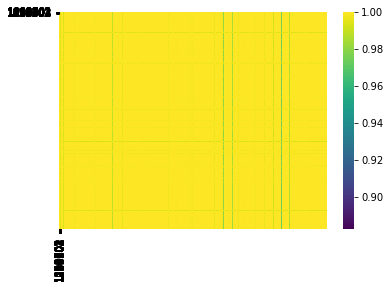

In [109]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.heatmap(cosine_sim, xticklabels=similar_users['userID'], yticklabels=similar_users['userID'], cmap='viridis')
plt.show()

In [111]:
## 비슷한 사람들 20명이 4이상 점수를 준 여행지역
df_sim = rating[(rating['userID'].isin(r_list)) & (rating['rating']>3)]
df_sim

,userID,rating,area
12,1000701,4.0,강원도 동해시
13,1000701,4.0,경상북도 영덕군
44,1002202,4.0,경기도 남양주시
99,1004601,4.0,경기도 이천시
100,1004601,4.0,경기도 이천시
101,1004601,4.0,경기도 양평군
102,1004601,4.0,경기도 양평군
257,1008602,4.0,경기도 수원시
258,1008602,4.0,강원도 강릉시
260,1008602,4.0,충청남도 태안군


In [113]:
result_1000203 = [(algo.predict(1000203, str(one), verbose=True)) for one in df_sim['area']]
result_1000203

user: 1000203    item: 강원도 동해시    r_ui = None   est = 3.97   {'was_impossible': False}
user: 1000203    item: 경상북도 영덕군   r_ui = None   est = 4.10   {'was_impossible': False}
user: 1000203    item: 경기도 남양주시   r_ui = None   est = 4.22   {'was_impossible': False}
user: 1000203    item: 경기도 이천시    r_ui = None   est = 3.96   {'was_impossible': False}
user: 1000203    item: 경기도 이천시    r_ui = None   est = 3.96   {'was_impossible': False}
user: 1000203    item: 경기도 양평군    r_ui = None   est = 3.93   {'was_impossible': False}
user: 1000203    item: 경기도 양평군    r_ui = None   est = 3.93   {'was_impossible': False}
user: 1000203    item: 경기도 수원시    r_ui = None   est = 3.88   {'was_impossible': False}
user: 1000203    item: 강원도 강릉시    r_ui = None   est = 4.09   {'was_impossible': False}
user: 1000203    item: 충청남도 태안군   r_ui = None   est = 4.04   {'was_impossible': False}
user: 1000203    item: 라북도 전주시    r_ui = None   est = 4.00   {'was_impossible': False}
user: 1000203    item: 강원도 속초시    r_ui = No

[Prediction(uid=1000203, iid='강원도 동해시', r_ui=None, est=3.968543945470454, details={'was_impossible': False}),
 Prediction(uid=1000203, iid='경상북도 영덕군', r_ui=None, est=4.097196238743475, details={'was_impossible': False}),
 Prediction(uid=1000203, iid='경기도 남양주시', r_ui=None, est=4.216940727589222, details={'was_impossible': False}),
 Prediction(uid=1000203, iid='경기도 이천시', r_ui=None, est=3.9622296498168534, details={'was_impossible': False}),
 Prediction(uid=1000203, iid='경기도 이천시', r_ui=None, est=3.9622296498168534, details={'was_impossible': False}),
 Prediction(uid=1000203, iid='경기도 양평군', r_ui=None, est=3.9320234975864907, details={'was_impossible': False}),
 Prediction(uid=1000203, iid='경기도 양평군', r_ui=None, est=3.9320234975864907, details={'was_impossible': False}),
 Prediction(uid=1000203, iid='경기도 수원시', r_ui=None, est=3.878523822762286, details={'was_impossible': False}),
 Prediction(uid=1000203, iid='강원도 강릉시', r_ui=None, est=4.094445876126421, details={'was_impossible': False}),
 Pre

In [ ]:
## 여행지역중 최대 평점 예측되는 지역
len(result_1000203)

38

In [116]:
result_1000203_est = [pred.est for pred in result_1000203]
len(result_1000203_est)

38

In [125]:
top1 =  np.argmax(result_1000203_est)

In [126]:
max_value = result_1000203_est[top1]
max_value

4.325235771839401

In [146]:
top5 = sorted(range(len(result_1000203_est)), key=lambda i: result_1000203_est[i])[-5:]
top5.reverse()
top5

[25, 19, 18, 31, 33]

In [147]:
for i in top5:
    print(result_1000203_est[i])

4.325235771839401
4.252754130396543
4.252754130396543
4.2395811001734875
4.2217531609244325


In [161]:
recommendation = []
for i in top5:
    print(result_1000203[i])
    recommendation.append(result_1000203[i][1])

user: 1000203    item: 제주특별자치도 서귀포시 r_ui = None   est = 4.33   {'was_impossible': False}
user: 1000203    item: 상남도 거제시    r_ui = None   est = 4.25   {'was_impossible': False}
user: 1000203    item: 상남도 거제시    r_ui = None   est = 4.25   {'was_impossible': False}
user: 1000203    item: 청남도 당진시    r_ui = None   est = 4.24   {'was_impossible': False}
user: 1000203    item: 상남도 하동군    r_ui = None   est = 4.22   {'was_impossible': False}


In [162]:
recommendation

['제주특별자치도 서귀포시', '상남도 거제시', '상남도 거제시', '청남도 당진시', '상남도 하동군']